<a href="https://colab.research.google.com/github/vaishnavisharma6/TIFR-CAM-/blob/main/Linear_System_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithm to solve a linear system of the form $Av = b$

## Part 1
Given a linear system:-
$$
Av = b
$$
where A is a tridiagonal $(n \times n)$ matrix of the form
$$
A = \begin{bmatrix}
\alpha_{1} & \gamma_{1} & 0 & \dots & 0\\
\beta_{2} & \alpha_{2} & \gamma_{2} & \ddots & \vdots\\
0 & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & \beta_{n-1} & \alpha_{n-1} & \gamma_{n-1}\\
0 & \dots & 0 & \beta_{n} & \alpha_{n} \end{bmatrix}
$$

v is a $(n \times 1)$ vector of the form:-
$$
v = \begin{bmatrix}
v_{1}\\
v_{2}\\
\vdots\\
v_{n} \end{bmatrix}
$$

b is a $(n \times 1)$ vector of the form:-
$$
b = \begin{bmatrix}
b_{1}\\
b_{2}\\
\vdots\\
b_{n} \end{bmatrix}
$$
We will write a function **solve()** that will take alpha,beta,gamma (where alpha,beta and gamma are main diagonal,sub-diagonal and super-diagonal respectively) and b as input and will give v as output.

The algorithm will be based on the method called Gaussian Elimination for tridiagonal linear systems.

Here is a brief overview of **Gaussian elimination**:-

The linear system described above can be equivalently written as:-
$$
\begin{eqnarray*}
\alpha_{1}v_{1} + \gamma_{1}v_{2} = b_{1},\\
\beta_{2}v_{1} + \alpha_{2}v_{2} + \gamma_{2}v_{3} = b_{2},\\
\hspace{3ex} \beta_{3}v_{2} + \alpha_{3}v{3} + \gamma_{3}v_{4} = b_{3},\\
\vdots \\
\beta_{n-1}v_{n-2} + \alpha_{n-1}v_{n-1} + \gamma_{n-1}v_{n} = b_{n-1},\\
\beta_{n}v_{n-1} + \alpha_{n}v_{n} = b_{n}
\end{eqnarray*}                 
$$                 
We will use first equation to eliminate the first variable($v_{1}$) from second equation. Then, new version of second equation will bes used to eliminate the second variable($v_{2}$) from third equation and so on.

If we subtract $m_{2}$ = $\beta_{2}$/$\alpha_{1}$ times the first equation from second equation, second equation becomes:-
$$
\delta_{2}v_{2} + \gamma_{2}v_{3} = c_{2}
$$
where
$$
\delta_{2} = \alpha_{2} - m_{2}\gamma_{1}
$$
and
$$
c_{2} = b_{2} - m_{2}b_{1}
$$

In general,
If $(j-1)_{th}$ equation has been transformed as:-
$$
\delta_{j-1}v_{j-1} + \gamma_{j-1}v_{j} = c_{j-1}
$$
And the original $(j)_{th}$ equation is:-
$$
\beta_{j}v_{j-1} + \alpha_{j}v_{j} + \gamma_{j}v_{j+1} = b_{j}
$$

Then if $m_{j}$ = $\beta_{j}/\delta_{j-1}$ times transformed $(j-1)_{th}$ equation is subtracted from original $j_{th}$ equation, we get:-
$$
\delta_{j}v_{j} + \gamma_{j}v_{j+1} = c_{j}
$$
where
$$
\delta_{j} = \alpha_{j} - m_{j}\gamma_{j-1},
$$
$$
c_{j} = b_{j} - m_{j}c_{j-1}.
$$

Hence the variables can be defined as:-
$$
\begin{eqnarray*}
\delta_{1} = \alpha_{1}, c_{1} = b_{1},\\
m_{j} = \beta_{j}/\delta_{j-1},\\
\delta_{j} = \alpha_{j} - m_{j}\gamma_{j-1}, \qquad 2 \le j \le k,\\
c_{j} = b_{j} - m_{j}c_{j-1}.
\end{eqnarray*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags 
from tabulate import tabulate
import random
import math
%config InlineBackend.figure_format = 'svg'

In [2]:
def solve(n,alpha,beta,gamma,b):
    delta = np.zeros(n)
    c = np.zeros(n)
    m = np.zeros(n)
    delta[0] = alpha[0]
    c[0] = b[0]
    v = np.zeros(n)
    for k in range(1,n):
        m[k] = beta[k]/delta[k-1]
        delta[k] = alpha[k] - (m[k]* gamma[k-1])
        c[k] = b[k] - (m[k] * c[k-1])
    v[n-1] = c[n-1]/delta[n-1]
    for j in range(n-2,-1,-1):
        v[j] = (c[j]- (gamma[j]*v[j+1]))/delta[j]
    return(v)

In [3]:
n = 5
alpha = np.random.rand(n)
beta = np.random.rand(n)
gamma = np.random.rand(n)
b = np.random.rand(n)
v = solve(n,alpha,beta,gamma,b)
print('Solution vector v is:',v)

Solution vector v is: [-0.24143092  0.4292924   1.16944398 -0.86191352  1.81564201]


In [4]:
# Function check
V = np.linspace(1,n,n)
alpha = 2 * np.ones(n)
beta = -1 * np.ones(n)
gamma = -1 * np.ones(n)
A = diags([beta,alpha,gamma],[-1,0,1],shape = (n,n)).toarray()
B = np.dot(A,V)
V1 = solve(n,alpha,beta,gamma,B)
print('Assumed vector v is:',V)
print('Output vector v is :',V1)

Assumed vector v is: [1. 2. 3. 4. 5.]
Output vector v is : [1. 2. 3. 4. 5.]


# Part 2
## For solving boundary value problems
We will now narrow down the matrix A to the coefficients matrix for second order finite difference scheme for the poisson's equation given by:-

$$
-u''(x) = f(x), \qquad x \in (0,1) 
$$
Subject to the conditions:-
$$
u(0) = u(1) = 0
$$

We will define a uniform grid of $n+1$ points from $x_{0} = 0$ to $x_{n+1} = 1$ with spacing
$$
h = \frac{1}{n+1}
$$
and
$$
x_j = j h, \qquad 0 \le j \le n+1
$$



Let the numerical solution 

$$
v_{j} \approx u(x_{j})
$$
Approximate $u''$ using second order central difference

\begin{eqnarray*}
U_0 &=& 0 \\
-\frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 1 \le j \le n \\
U_1 &=& 0
\end{eqnarray*}

Therefore, we form a linear system of the form:-
$$
\frac{1}{h^2}
\begin{bmatrix} 
2 & -1 & 0 & \dots & 0 \\ 
-1 & 2 & -1 & \ddots & \vdots\\ 
0 & \ddots & \ddots & \ddots & 0 \\ 
\vdots & \ddots & -1 & 2 & -1 \\
0 & \dots & 0 & -1 & 2
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n \\
\end{bmatrix} = 
\begin{bmatrix}
f_1  \\
f_2 \\
\vdots \\
f_{n} \\
\end{bmatrix}
$$

Some of the functions f(x) for which we will solve this linear system are:-
\begin{eqnarray*}
f(x) = x^{2}\\
f(x) = e^{x}\\
f(x) = cos(ax)
\end{eqnarray*}

In [5]:
n = 20
h = 1/(n+1)
alpha = (1/h**2) * 2 * np.ones(n)
beta = (1/h**2) * -1 * np.ones(n)
gamma = (1/h**2) * -1 * np.ones(n)
x = np.linspace(0+h,1-h,n)
b1 = x**2
b2 = np.exp(x)
b3 = np.cos(2*x)
v1 = solve(n,alpha,beta,gamma,b1)
v2 = solve(n,alpha,beta,gamma,b2)
v3 = solve(n,alpha,beta,gamma,b3)

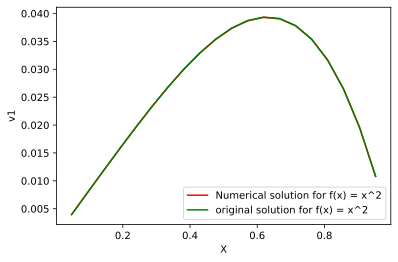

In [6]:
## original functions after analytically solving the equation
u1 = (1/12)*(x- x**4)
u2 = (np.e-1)*x - np.exp(x)+1
u3 = (1/4) * (np.cos(2*x)+((1-np.cos(2))*x)-1)    
plt.xlabel('X')
plt.ylabel('v1')
plt.plot(x,v1,'r', label = 'Numerical solution for f(x) = x^2')
plt.plot(x,u1,'g', label = 'original solution for f(x) = x^2')
plt.legend()

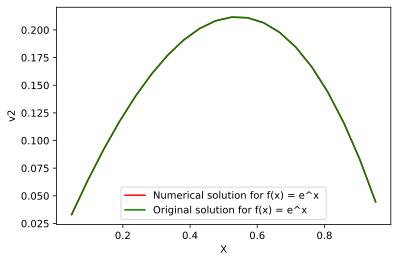

In [7]:
plt.xlabel('X')
plt.ylabel('v2')
plt.plot(x,v2,'r',label = 'Numerical solution for f(x) = e^x ')
plt.plot(x,u2,'g',label = 'Original solution for f(x) = e^x')
plt.legend()

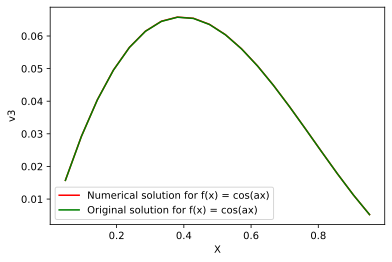

In [8]:
plt.xlabel('X')
plt.ylabel('v3')
plt.plot(x,v3,'r',label = 'Numerical solution for f(x) = cos(ax)')
plt.plot(x,u3,'g',label = 'Original solution for f(x) = cos(ax)')
plt.legend()

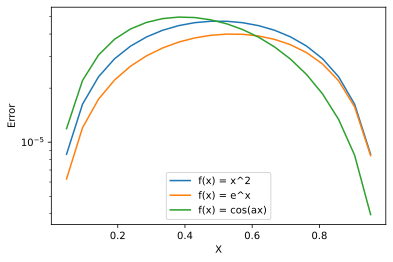

In [9]:
#plot for x vs error
plt.semilogy(x,np.abs(u1-v1),label = 'f(x) = x^2')
plt.semilogy(x,np.abs(u2-v2),label = 'f(x) = e^x')
plt.semilogy(x,np.abs(u3-v3),label = 'f(x) = cos(ax)')
plt.xlabel('X')
plt.ylabel('Error')
plt.legend()

## Error Calculation
Error for a specific value of h can calculated by:
$$
E_{h} = max |u(x_{j}) - v_{j}|, \qquad 0 \le j \le n+1
$$

where $v_{j}$ is approximated value for u($x_{j}$).


After plotting $E_{h}$ vs $h$, we will observe that :-
$$
E_{h} \propto h.
$$

And $E_{h}$ satisfies a bound of the form:-
$$
E_{h} = O(h^{2}).
$$

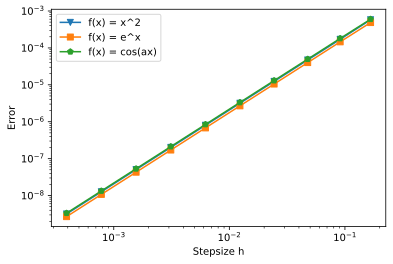

In [10]:
#for calculating error
m = 5
iterations = 10
max_error_1 = []
max_error_2 = []
max_error_3 = []
step_size = []
for i in range(iterations):
    h = 1/(m+1)
    x = np.linspace(0+h,1-h,m)
    l = np.linspace(1,m,m)
    alpha = (1/h**2) * 2 * np.ones(m)
    beta = (1/h**2) * -1 * np.ones(m)
    gamma = (1/h**2) * -1 * np.ones(m)
    b1 = x**2
    b2 = np.exp(x)
    b3 = np.cos(2*x)
    v1 = solve(m,alpha,beta,gamma,b1)
    v2 = solve(m,alpha,beta,gamma,b2)
    v3 = solve(m,alpha,beta,gamma,b3)
    u1 = (1/12)*(x- x**4)
    u2 = (np.e-1)*x - np.exp(x)+1
    u3 = (1/4) * (np.cos(2*x)+((1-np.cos(2))*x)-1) 
    max_error_1.append(np.max(abs(u1-v1)))
    max_error_2.append(np.max(abs(u2-v2)))
    max_error_3.append(np.max(abs(u3-v3)))
    step_size.append(x[1]-x[0])
    m *= 2
plt.xlabel('Stepsize h')
plt.ylabel('Error')
plt.loglog(step_size,max_error_1,'-v',label = 'f(x) = x^2')
plt.loglog(step_size,max_error_2,'-s',label = 'f(x) = e^x')
plt.loglog(step_size,max_error_3,'-p',label = 'f(x) = cos(ax)')
plt.legend()    

## Convergence Matrix
Finally, we will find the convergence matrix that shows how fast the approximated values are converging towards original function values with respect to n.
Rate of Convergence, $\alpha$, for both schemes can be calculated by:
$$
\alpha = \frac{log(e_{h_{1}}/e_{h_{2}})}{log({h_{1}/h_{2}})}
$$

where 
$e_{h_{1}}$ is error of scheme for stepsize $h_{1}.$

$h_{1}$ is stepsize for number of grid points $n_{1}$
$$
h_{1} = \frac{1}{n_{1} + 1}
$$

$e_{h_{2}}$ is error of scheme for stepsize $h_{2}.$

$h_{2}$ is stepsize for number of grid points $n_{2}$
$$
h_{2} = \frac{1}{n_{2} + 1}
$$

In [11]:
a = len(step_size)
conv1 = []
conv2 = []
conv3 = []
for i in range(a-1):
    conv1.append((np.log(max_error_1[i]/max_error_1[i+1]))/(np.log(step_size[i]/step_size[i+1])))
    conv2.append((np.log(max_error_2[i]/max_error_2[i+1]))/(np.log(step_size[i]/step_size[i+1])))
    conv3.append((np.log(max_error_3[i]/max_error_3[i+1]))/(np.log(step_size[i]/step_size[i+1])))
print('Convergence table for f(x) = x^2:')
print(tabulate([conv1]))
print()
print('Convergence table for f(x) = e^(x):')
print(tabulate([conv2]))
print()
print('Convergence table for f(x) = cos(ax):')
print(tabulate([conv3]))

Convergence table for f(x) = x^2:
-------  -------  ------  -------  -------  -------  -------  -  -------
2.01369  1.99068  1.9975  1.99935  1.99983  1.99996  1.99999  2  1.99998
-------  -------  ------  -------  -------  -------  -------  -  -------

Convergence table for f(x) = e^(x):
------  -------  -------  -------  -------  -  -  -  -------
1.9872  2.00134  1.99816  1.99986  1.99998  2  2  2  1.99989
------  -------  -------  -------  -------  -  -  -  -------

Convergence table for f(x) = cos(ax):
-------  -------  -------  -------  -------  -------  -  -  -------
1.98096  1.99565  1.99933  2.00007  2.00004  1.99998  2  2  2.00004
-------  -------  -------  -------  -------  -------  -  -  -------


# Part 3
## Modified algorithm for series of linear systems by LU Decomposition
Often, we want to solve many linear systems of the form $Av = b$ at once in which matrix A remains fixed but b changes(and hence v changes).
If we want to solve 
$$
Av_{l} = b_{l}
$$
for $l = 1,2,...N$

Here, matrix A doesn't depend on l.

The Right-hand side vector $b_{l} \in R^{n}$ is given for each value of l.

To solve such problems, we will modify the function according to a theorem called **LU Decomposition**.

LU Decomposition can also be said as another form of gaussian elimination as we eliminate the variables to form  upper triangular and lower triangualr matrices in gaussian elimination.

According to LU Decomposition, Given a matrix $A \in R^{m \times n}$ with $m \geq n$, its LU factorization is given by $A = LU$  where $L \in R^{m \times n}$ is unit lower triangular and $U \in R^{n \times n}$ is upper traingular with non-zeros on its diagonal.

Function $LU\_decomposition$ will output the matrix $L$ and $U$ for matrix $A$.

Then $L$ and $U$ matrices will be used in $solve()$ function to give the value of solution vector $v$.

## LU Decomposition
Let A be a $(n \times n)$ tridiagonal matrix as follows:-

$$
A = \begin{bmatrix}
\alpha_{1} & \gamma_{1} & 0 & \dots & 0\\
\beta_{2} & \alpha_{2} & \gamma_{2} & \ddots & \vdots\\
0 & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & \beta_{n-1} & \alpha_{n-1} & \gamma_{n-1}\\
0 & \dots & 0 & \beta_{n} & \alpha_{n} \end{bmatrix}
$$




Then $LU$ Decomposition of $A$ is given by:- 
$$
A = LU
$$

where
$L$ is $(n \times n)$ lower triangular matrix and $U$ is $(n \times n)$ upper triangular matrix.



For tridiagonal matrices,
$$
L = 
\begin{bmatrix}
1 & 0 & 0 & \dots & 0\\
l_{1} & 1 & 0 & \dots & 0\\
0 & l_{2} & 1 & \dots & 0\\
\vdots & 0 & \ddots & \ddots & 0\\
0 & 0 & \dots & l_{n} & 1
\end{bmatrix}
$$


$$
U = 
\begin{bmatrix}
u_{1} & \gamma_{1} & 0 & \dots & 0\\
0 & u_{2} & \gamma_{2} & \dots & 0\\
\vdots & \ddots & \ddots & \ddots & \vdots\\
0 & \dots & 0 & u_{n-1} & \gamma_{n}\\
0 & \dots & \dots & 0 & u_{n}
\end{bmatrix}
$$

After obtaining $L$ and $U$, we will call function $solve()$ that will take $L,$ $U$ and $b$ as inputs and will give solution vector $v$ as output.
### LU Decomposition algorithm
Algorithm for LU_decomposition can be described as follows:-
$$
\begin{eqnarray*}
u_{1} = \alpha_{1}\\
\text{solve for $l_{i}$}:
l_{i-1}u_{i-1} = \beta_{i-1}  , \qquad 2\le i \le n \\
u_{i} = \alpha_{i} - (l_{i-1}* \gamma_{i-1}), \qquad 2\le i \le n
\end{eqnarray*}
$$

### Solve() function algorithm
After obtaining $L$ and $U$, $Av = b$ can be rewritten as :
$$
LUv = b
$$

This can be rewritten as :-
$$
\begin{eqnarray*}
Lx = b\\
\text{where x = Uv}
\end{eqnarray*}
$$

Above equation can be solved for $x$ by forward substitution as follows:-
$$
\begin{eqnarray*}
x_{1} = b_{1}\\
x_{i} = b_{i} - (l_{i-1}*x_{i-1}), \qquad 2\le i \le n
\end{eqnarray*}
$$

After obtaining $x$, we will solve
$$
Uv = x
$$
by backward substitution as follows:-

$$
\begin{eqnarray*}
v_{n} = x_{n}/u_{n}\\
\text{for i = N-1:-1:-1 (reverse loop)}\\
\text{Solve for $v_{i}$}:\\
u_{i}v_{i} = x_{i} - (\gamma_{i}*x_{i+1})
\end{eqnarray*}
$$

In [12]:
def LU_decomposition(n,alpha,beta,gamma):
    for i in range(1,n):
        beta[i-1] = beta[i-1]/alpha[i-1]  #Overwriting beta with vector l
        alpha[i] = alpha[i] - (beta[i-1]*gamma[i-1]) #Overwriting alpha with vector u, gamma remains unchanged
    return(alpha,beta,gamma)    

In [13]:
def solve(alpha1, beta1, gamma1,b):
    n = alpha1.shape[0]
    y = np.zeros(n)
    v = np.zeros(n)
    y[0] = b[0]
    for i in range(1,n):
        y[i] = b[i] - (beta1[i-1]*y[i-1])
    v[n-1] = y[n-1]/alpha1[n-1]
    for i in range(n-2,-1,-1):
        v[i] = (y[i] - (gamma[i]*v[i+1]))/alpha[i]
    return(v)    

In [14]:
# LU Decomposition function call
n = 10
h = 1/(n+1)
x = np.linspace(0+h,1-h,n)
alpha = (1/h**2) * 2 * np.ones(n)
beta = (1/h**2) * -1 * np.ones(n-1)
gamma = (1/h**2) * -1 * np.ones(n-1)
b = x**2
alpha1, beta1, gamma1 = LU_decomposition(n,alpha,beta,gamma)
v = solve(alpha1,beta1,gamma1,b)
print('Solution vector v is:',v)

Solution vector v is: [0.00751315 0.01495799 0.02212964 0.02868657 0.03415067 0.03790725
 0.03920497 0.03715593 0.03073561 0.01878287]


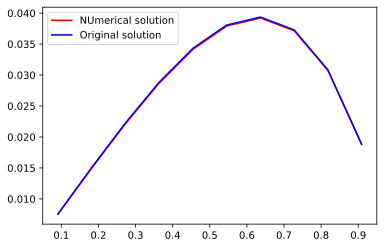

In [15]:
# Checking algorithm for f(x) = x^2
u = (1/12)*(x- x**4)
plt.plot(x,v,'r',label = 'NUmerical solution')
plt.plot(x,u,'b',label = 'Original solution')
plt.legend()

# Part 4
## Implementing modified algorithm for $f(x) = e^{x/l}$
Now, we will use the above modified algorithm for solving the following problems:-
$$
-u''(x) = e^{x/l},     \qquad x \in (0,1) 
$$
Subject to the conditions:-
$$
u(0) = 0, u(1) = 0.
$$
$\text{for}$ $l = 1,2,...10.$

And then we will plot the numerical solution and exact solutions in single plot to show how it is varying with increasing value of l.


In [16]:
# Defining right hand side vector b For f(x) = e^(x/l) for various l
b1 = np.exp(x/1)
b2 = np.exp(x/2)
b3 = np.exp(x/3)
b4 = np.exp(x/4)
b5 = np.exp(x/5)
b6 = np.exp(x/6)
b7 = np.exp(x/7)
b8 = np.exp(x/8)
b9 = np.exp(x/9)
b10 = np.exp(x/10)

In [17]:
# function call for all functions 
v1 = solve(alpha1,beta1,gamma1,b1)
u1 = -np.exp(x) + ((np.e - 1)*x) + 1    #Exact function u1,u2,...u10

v2 = solve(alpha1,beta1,gamma1,b2)
u2 = (-4*np.exp(x/2)) + ((4*((np.exp(1/2)) -1))*x) + 4

v3 = solve(alpha1,beta1,gamma1,b3)
u3 = (-9*np.exp(x/3)) + ((9*((np.exp(1/3)) -1))*x) + 9

v4 = solve(alpha1,beta1,gamma1,b4)
u4 = (-16*np.exp(x/4)) + ((16*((np.exp(1/4)) -1))*x) + 16

v5 = solve(alpha1,beta1,gamma1,b5)
u5 = (-25*np.exp(x/5)) + ((25*((np.exp(1/5)) -1))*x) + 25

v6 = solve(alpha1,beta1,gamma1,b6)
u6 = (-36*np.exp(x/6)) + ((36*((np.exp(1/6)) -1))*x) + 36

v7 = solve(alpha1,beta1,gamma1,b7)
u7 = (-49*np.exp(x/7)) + ((49*((np.exp(1/7)) -1))*x) + 49

v8 = solve(alpha1,beta1,gamma1,b8)
u8 = (-64*np.exp(x/8)) + ((64*((np.exp(1/8)) -1))*x) + 64

v9 = solve(alpha1,beta1,gamma1,b9)
u9 = (-81*np.exp(x/9)) + ((81*((np.exp(1/9)) -1))*x) + 81

v10 = solve(alpha1,beta1,gamma1,b10)
u10 = (-100*np.exp(x/10)) + ((100*((np.exp(1/10)) -1))*x) + 100


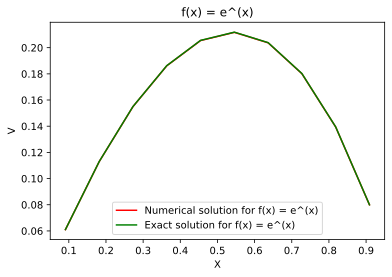

In [18]:
# function plot
plt.title('f(x) = e^(x)')
plt.plot(x,v1,'r',label = 'Numerical solution for f(x) = e^(x)')
plt.plot(x,u1,'g',label = 'Exact solution for f(x) = e^(x)')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()

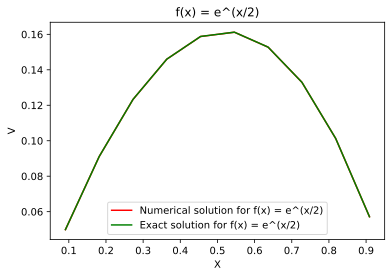

In [19]:
plt.title('f(x) = e^(x/2)')
plt.plot(x,v2,'r',label = 'Numerical solution for f(x) = e^(x/2)')
plt.plot(x,u2, 'g',label = 'Exact solution for f(x) = e^(x/2)')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()

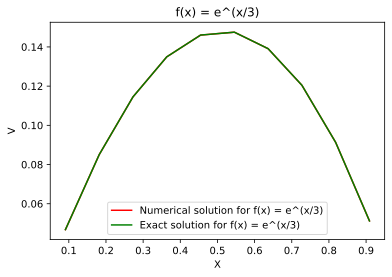

In [20]:
plt.title('f(x) = e^(x/3)')
plt.plot(x,v3,'r',label = 'Numerical solution for f(x) = e^(x/3)')
plt.plot(x,u3, 'g',label = 'Exact solution for f(x) = e^(x/3)')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()

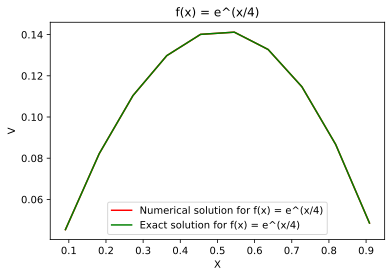

In [21]:
plt.title('f(x) = e^(x/4)')
plt.plot(x,v4,'r',label = 'Numerical solution for f(x) = e^(x/4)')
plt.plot(x,u4, 'g',label = 'Exact solution for f(x) = e^(x/4)')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()

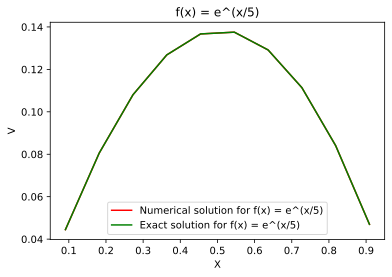

In [22]:
plt.title('f(x) = e^(x/5)')
plt.plot(x,v5,'r',label = 'Numerical solution for f(x) = e^(x/5)')
plt.plot(x,u5, 'g',label = 'Exact solution for f(x) = e^(x/5)')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()

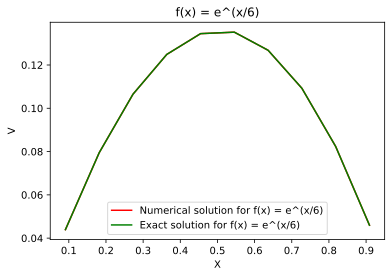

In [23]:
plt.title('f(x) = e^(x/6)')
plt.plot(x,v6,'r',label = 'Numerical solution for f(x) = e^(x/6)')
plt.plot(x,u6, 'g',label = 'Exact solution for f(x) = e^(x/6)')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()

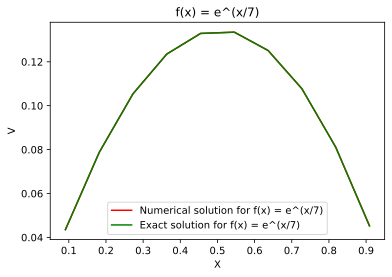

In [24]:
plt.title('f(x) = e^(x/7)')
plt.plot(x,v7,'r',label = 'Numerical solution for f(x) = e^(x/7)')
plt.plot(x,u7, 'g',label = 'Exact solution for f(x) = e^(x/7)')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()

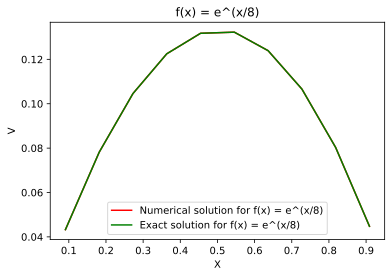

In [25]:
plt.title('f(x) = e^(x/8)')
plt.plot(x,v8,'r',label = 'Numerical solution for f(x) = e^(x/8)')
plt.plot(x,u8, 'g',label = 'Exact solution for f(x) = e^(x/8)')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()

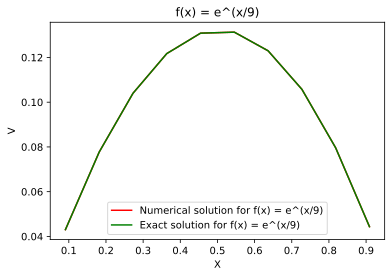

In [26]:
plt.title('f(x) = e^(x/9)')
plt.plot(x,v9,'r',label = 'Numerical solution for f(x) = e^(x/9)')
plt.plot(x,u9, 'g',label = 'Exact solution for f(x) = e^(x/9)')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()

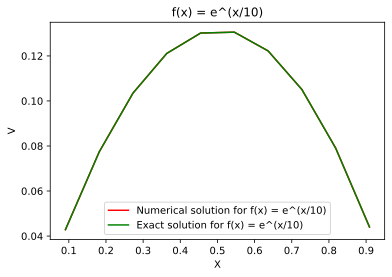

In [27]:
plt.title('f(x) = e^(x/10)')
plt.plot(x,v10,'r',label = 'Numerical solution for f(x) = e^(x/10)')
plt.plot(x,u10, 'g',label = 'Exact solution for f(x) = e^(x/10)')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()

### From above plots, we can observe that as the value of $l$ is increasing, the solution curves for different values of $l$ are becoming similar and it is becoming difficult to differentiate between the curves for different values of $l$.